<a href="https://colab.research.google.com/github/vinilvadakkepurakkal/self-driving-car/blob/master/traffic_sign_detection_alogirthm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the Deep learning code for detecting traffic signs - created by Vinil Vadakkepurakkal

In [1]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs.git
  

Cloning into 'german-traffic-signs'...
remote: Counting objects: 6, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0)
Unpacking objects: 100% (6/6), done.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import pandas as pd
import random

Using TensorFlow backend.


In [0]:
np.random.seed(0)

In [4]:
!ls -l german-traffic-signs

total 155884
-rw-r--r-- 1 root root       999 Jan 24 14:35 signnames.csv
-rw-r--r-- 1 root root  38888118 Jan 24 14:35 test.p
-rw-r--r-- 1 root root 107146452 Jan 24 14:35 train.p
-rw-r--r-- 1 root root  13578712 Jan 24 14:35 valid.p


In [0]:
with open('german-traffic-signs/train.p', 'rb') as f:
  train_data= pickle.load(f)
with open('german-traffic-signs/test.p', 'rb') as f:
  test_data= pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
  val_data= pickle.load(f)

In [6]:
X_train , y_train = train_data['features'] , train_data['labels']
X_test , y_test = test_data['features'] , test_data['labels']
X_val , y_val = val_data['features'] , val_data['labels']

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [0]:
assert(X_train.shape[0] == y_train.shape[0]),"train image  and labels are not matching"
assert(X_val.shape[0] == y_val.shape[0]),"val image and lables are not matching"
assert(X_test.shape[0] == y_test.shape[0]),"test image and labels are not matching"
assert(X_train.shape[1:] == (32,32,3)), " train image and size is not 32, 32, 3"
assert(X_test.shape[1:] == (32,32,3)), " train image and size is not 32, 32, 3"
assert(X_val.shape[1:] == (32,32,3)), " train image and size is not 32, 32, 3"

In [0]:
data = pd.read_csv('german-traffic-signs/signnames.csv')

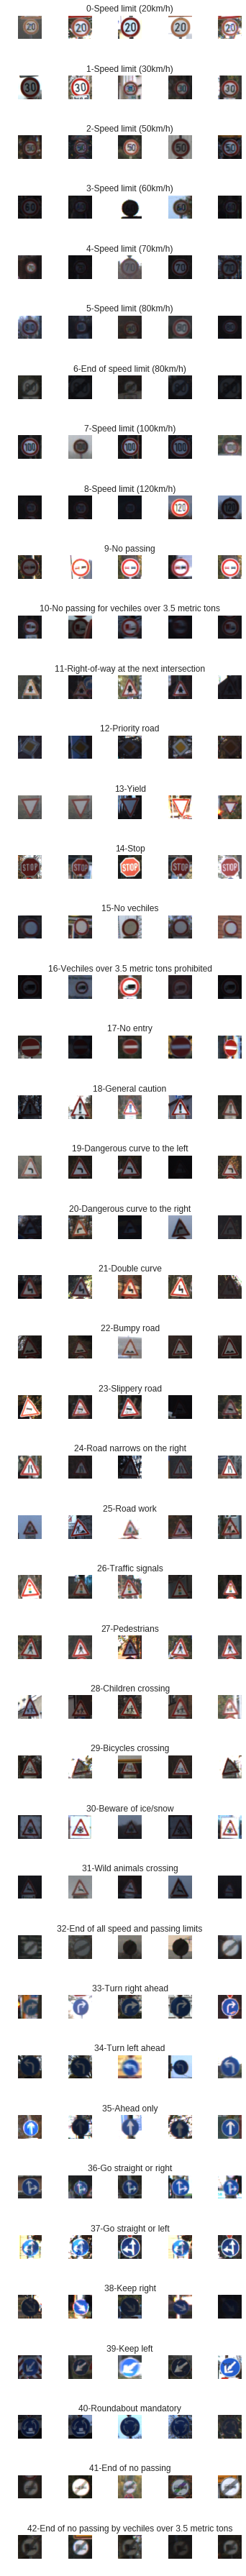

In [9]:
num_of_samples=[]
 
cols = 5
num_classes = 43
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()
 
for i in range(cols):
    for j, row in data.iterrows():
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j) + '-' + row['SignName'])
        num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


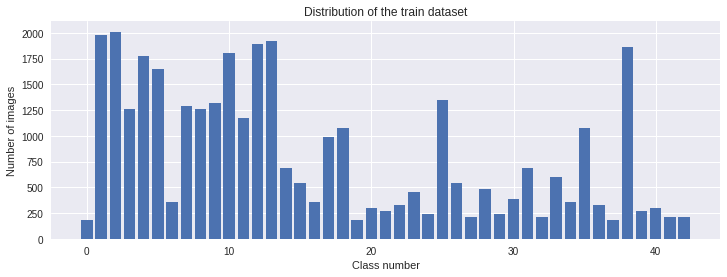

In [10]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

(32, 32, 3)
36


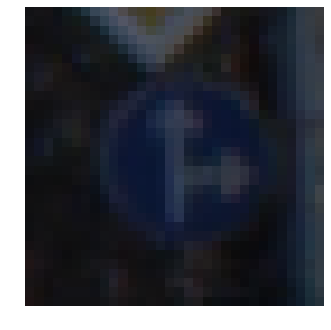

In [11]:
import cv2
plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape)
print(y_train[1000])

(-0.5, 31.5, 31.5, -0.5)

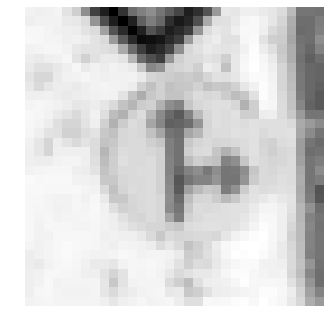

In [12]:
def grayscale(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return img

img = grayscale(X_train[1000])
plt.imshow(img) 
plt.axis("off")

(-0.5, 31.5, 31.5, -0.5)

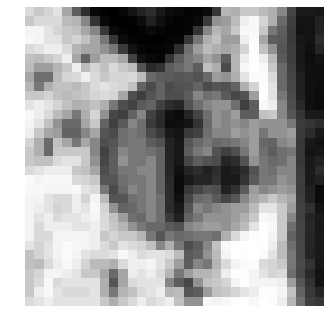

In [13]:
def equalize(img):
  img = cv2.equalizeHist(img)
  return img

img = equalize(img)
plt.imshow(img)
plt.axis("off")

In [0]:
def preprocessing(img):
  img = grayscale(img)
  img = equalize(img)
  img = img/255
  return img

X_train = np.array(list(map(preprocessing, X_train)))
X_test = np.array(list(map(preprocessing, X_test)))
X_val = np.array(list(map(preprocessing, X_val)))

(34799, 32, 32)
(12630, 32, 32)
(4410, 32, 32)


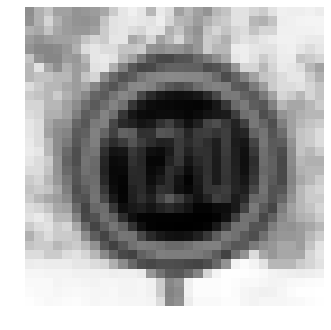

In [15]:
plt.imshow(X_train[random.randint(0, len(X_train - 1))])
plt.axis("off")
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

In [0]:
X_train  = X_train.reshape(34799, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)
X_test  = X_test.reshape(12630, 32, 32,1)

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2, shear_range=0.1,rotation_range=10)

datagen.fit(X_train)

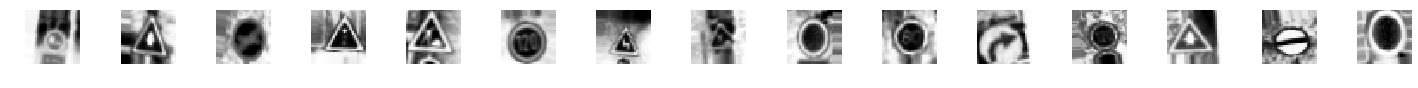

In [18]:
batches = datagen.flow(X_train, y_train, batch_size=20)
x_batch , y_batch = next(batches)
fig , axs = plt.subplots(1,15, figsize=(20,5))
fig.tight_layout()

for i in range(15):
    axs[i].imshow(x_batch[i].reshape(32,32))
    axs[i].axis('off')

In [19]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


In [0]:
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)
y_test = to_categorical(y_test, 43)

In [0]:
def leNet_model():
    model = Sequential()
    model.add(Conv2D(60, (5,5) , input_shape=(32,32,1) , activation='relu'))
    model.add(Conv2D(60, (5,5) , activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),))
    
    model.add(Conv2D(30,(3,3), activation='relu'))
    model.add(Conv2D(30,(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    #model.add(Dropout(0.5))
    
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes,activation='softmax'))
    model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [22]:
model = leNet_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 480)               0         
__________

In [23]:
#h= model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=400, verbose=1, shuffle=1)
h= model.fit_generator(datagen.flow(X_train, y_train, batch_size=50), steps_per_epoch=2000, epochs=10, validation_data=(X_val, y_val), shuffle=1)

Epoch 1/10
2000/2000 [==============================] - 54s 27ms/step - loss: 0.8251 - acc: 0.7564 - val_loss: 0.0618 - val_acc: 0.9841
Epoch 2/10
2000/2000 [==============================] - 50s 25ms/step - loss: 0.1940 - acc: 0.9401 - val_loss: 0.0444 - val_acc: 0.9864
Epoch 3/10
2000/2000 [==============================] - 50s 25ms/step - loss: 0.1314 - acc: 0.9591 - val_loss: 0.0322 - val_acc: 0.9896
Epoch 4/10
2000/2000 [==============================] - 51s 25ms/step - loss: 0.1039 - acc: 0.9678 - val_loss: 0.0436 - val_acc: 0.9866
Epoch 5/10
2000/2000 [==============================] - 50s 25ms/step - loss: 0.0870 - acc: 0.9735 - val_loss: 0.0307 - val_acc: 0.9907
Epoch 6/10
2000/2000 [==============================] - 50s 25ms/step - loss: 0.0752 - acc: 0.9767 - val_loss: 0.0730 - val_acc: 0.9866
Epoch 7/10
2000/2000 [==============================] - 49s 25ms/step - loss: 0.0678 - acc: 0.9792 - val_loss: 0.0383 - val_acc: 0.9918
Epoch 8/10
2000/2000 [==========================

Text(0.5, 1.0, 'loss')

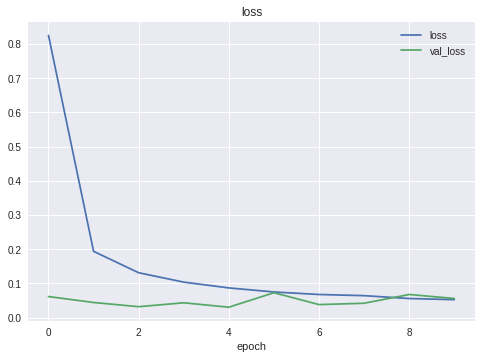

In [24]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.xlabel('epoch')
plt.title('loss')

Text(0.5, 1.0, 'accuracy')

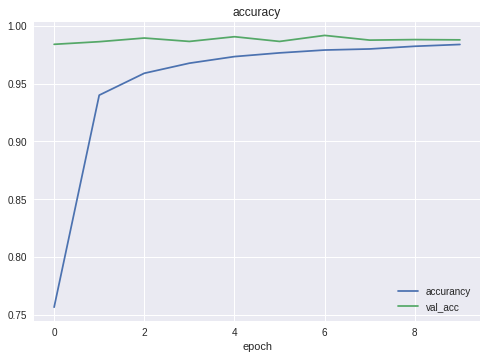

In [25]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['accurancy', 'val_acc'])
plt.xlabel('epoch')
plt.title('accuracy')

In [26]:
score=model.evaluate(X_test,y_test,verbose=0)
print('Test score:',score[0])
print('Accuracy:',score[1])

Test score: 0.11478972804732963
Accuracy: 0.9724465558383546


(32, 32)
predicted sign: [31]


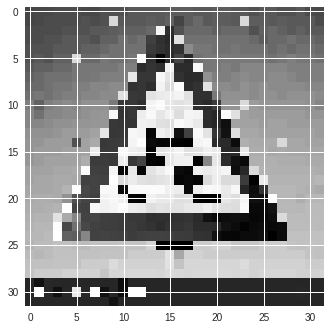

In [27]:
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
 
#Preprocess image
 
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
 
#Reshape reshape
 
img = img.reshape(1, 32, 32, 1)
 
#Test image
print("predicted sign: "+ str(model.predict_classes(img)))




In [0]:
img = img.reshape(1,32,32,1)

In [29]:
print ("predicted sign: "+ str(model.predict_classes(img)))

predicted sign: [31]
